<a href="https://colab.research.google.com/github/Arjunkalliyadath/Github-Project/blob/main/Unsupervised_Learning_casestudy(20_01_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
adult_df = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/adult_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
adult_df.info()
adult_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


# Data Preprocessing

Identify missing values

In [ ]:
adult_df.isnull().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [ ]:
(adult_df == "?").sum()

,0
age,0
workclass,1763
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1758
relationship,0
race,0
sex,0


In [ ]:
#Replacing "?" with NaN

adult_df.replace("?", np.nan, inplace=True)

In [ ]:
adult_df.isnull().sum()

,0
age,2442
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


Separating columns

In [ ]:
#Numerical columns
num_cols = adult_df.select_dtypes(include=['int64', 'float64']).columns

#Categorical columns
cat_cols = adult_df.select_dtypes(include=['object']).columns

HANDLING MISSING VALUES

In [ ]:
#Categorical columns → MODE
for col in cat_cols:
    adult_df[col] = adult_df[col].fillna(adult_df[col].mode()[0])


#Numerical columns → MEDIAN
for col in num_cols:
    adult_df[col] = adult_df[col].fillna(adult_df[col].median())

In [ ]:
adult_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Identifying categorical columns

In [ ]:
cat_cols = adult_df.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
#Separating income (Income helps explain the clusters after they are formed.)
income_col = adult_df['income']
adult_df_features = adult_df.drop('income', axis=1)

In [ ]:
cat_cols = adult_df_features.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

Applying one-hot encoding

In [ ]:
adult_encoded_df = pd.get_dummies(
    adult_df_features,
    columns=cat_cols,
    drop_first=True
)

In [ ]:
adult_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  float64
 1   fnlwgt                                     48842 non-null  int64  
 2   education-num                              48842 non-null  int64  
 3   capital-gain                               48842 non-null  int64  
 4   capital-loss                               48842 non-null  int64  
 5   hours-per-week                             48842 non-null  float64
 6   workclass_Local-gov                        48842 non-null  bool   
 7   workclass_Never-worked                     48842 non-null  bool   
 8   workclass_Private                          48842 non-null  bool   
 9   workclass_Self-emp-inc                     48842 non-null  bool   
 10  workclass_Self-emp-not

In [ ]:
#Selecting numerical columns

num_cols = adult_encoded_df.select_dtypes(include=['int64', 'float64']).columns

num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Detecting and treating outliers using IQR

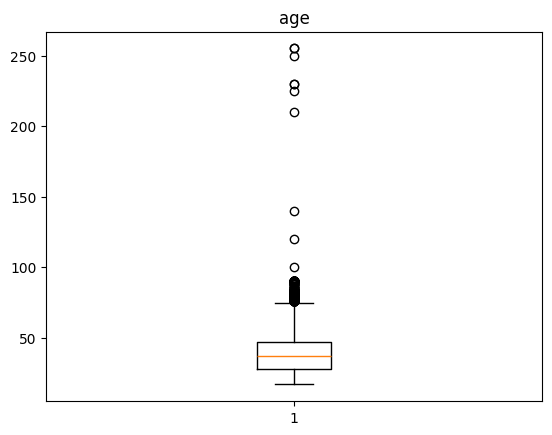

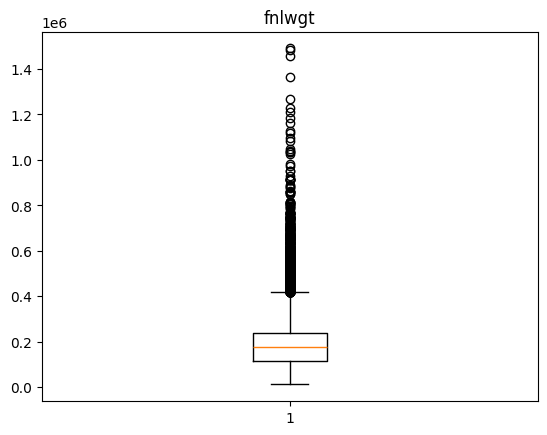

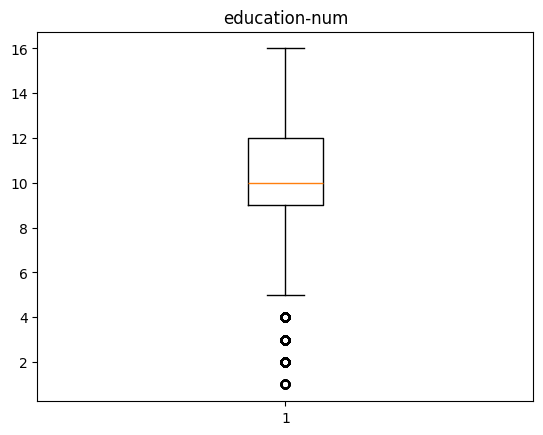

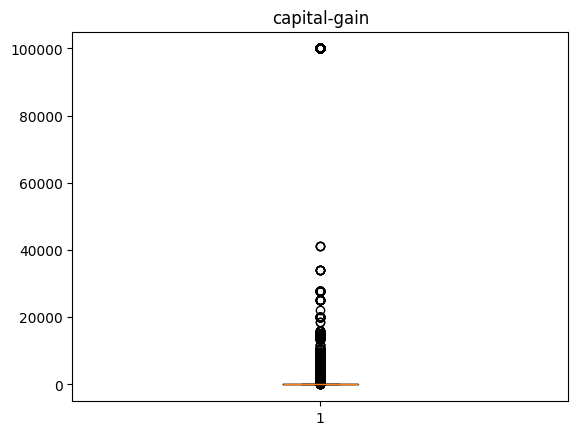

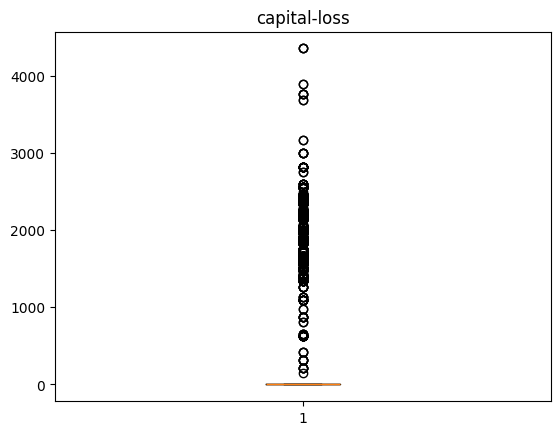

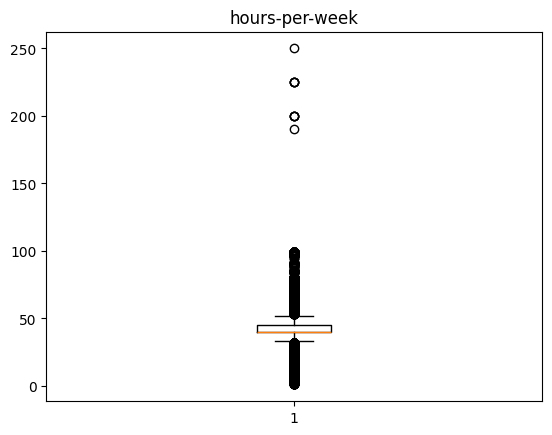

In [ ]:
#Detecting Outliers

for col in num_cols:
    plt.figure()
    plt.boxplot(adult_encoded_df[col])
    plt.title(col)
    plt.show()

In [ ]:
#Treating outliers using IQR

for col in num_cols:
    Q1 = adult_encoded_df[col].quantile(0.25)
    Q3 = adult_encoded_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    adult_encoded_df[col] = adult_encoded_df[col].clip(lower, upper)

In [ ]:
adult_encoded_df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.0,48842.0,48842.000000
mean,38.531387,186770.707163,10.122088,0.0,0.0,41.129683
std,13.271160,95328.614282,2.456895,0.0,0.0,6.033548
min,17.000000,12285.000000,4.500000,0.0,0.0,32.500000
25%,28.000000,117550.500000,9.000000,0.0,0.0,40.000000
50%,37.000000,178144.500000,10.000000,0.0,0.0,40.000000
75%,47.000000,237642.000000,12.000000,0.0,0.0,45.000000
max,75.500000,417779.250000,16.000000,0.0,0.0,52.500000


Applying StandardScaler

In [ ]:
scaler = StandardScaler()

adult_scaled = scaler.fit_transform(adult_encoded_df)

In [ ]:
#Converting the scaled NumPy array back into a DataFrame with original column names

adult_scaled_df = pd.DataFrame(adult_scaled,columns=adult_encoded_df.columns)

In [ ]:
adult_scaled_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,4.884200e+04,4.884200e+04,4.884200e+04,48842.0,48842.0,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,...,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,-1.786468e-16,1.774829e-17,-3.207786e-16,0.0,0.0,4.042828e-16,-6.662884e-17,-2.618601e-18,-1.478055e-16,7.623037e-17,...,-2.909556e-19,1.091084e-17,5.528157e-18,3.607850e-17,1.440230e-17,-1.454778e-17,-2.618601e-18,1.491148e-17,-1.847568e-17,1.600256e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,0.0,0.0,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.622436e+00,-1.830379e+00,-2.288313e+00,0.0,0.0,-1.430298e+00,-2.545879e-01,-1.357577e-02,-1.802287e+00,-1.855143e-01,...,-3.678484e-02,-5.996554e-02,-2.023985e-02,-4.663672e-02,-3.536222e-02,-2.437425e-02,-2.263000e-02,-3.366577e+00,-4.125833e-02,-2.170548e-02
25%,-7.935625e-01,-7.261295e-01,-4.567143e-01,0.0,0.0,-1.872356e-01,-2.545879e-01,-1.357577e-02,5.548506e-01,-1.855143e-01,...,-3.678484e-02,-5.996554e-02,-2.023985e-02,-4.663672e-02,-3.536222e-02,-2.437425e-02,-2.263000e-02,2.970376e-01,-4.125833e-02,-2.170548e-02
50%,-1.153933e-01,-9.049010e-02,-4.969232e-02,0.0,0.0,-1.872356e-01,-2.545879e-01,-1.357577e-02,5.548506e-01,-1.855143e-01,...,-3.678484e-02,-5.996554e-02,-2.023985e-02,-4.663672e-02,-3.536222e-02,-2.437425e-02,-2.263000e-02,2.970376e-01,-4.125833e-02,-2.170548e-02
75%,6.381281e-01,5.336468e-01,7.643517e-01,0.0,0.0,6.414727e-01,-2.545879e-01,-1.357577e-02,5.548506e-01,-1.855143e-01,...,-3.678484e-02,-5.996554e-02,-2.023985e-02,-4.663672e-02,-3.536222e-02,-2.437425e-02,-2.263000e-02,2.970376e-01,-4.125833e-02,-2.170548e-02
max,2.785664e+00,2.423311e+00,2.392440e+00,0.0,0.0,1.884535e+00,3.927916e+00,7.366063e+01,5.548506e-01,5.390419e+00,...,2.718511e+01,1.667624e+01,4.940749e+01,2.144233e+01,2.827876e+01,4.102690e+01,4.418914e+01,2.970376e-01,2.423753e+01,4.607131e+01


# EDA

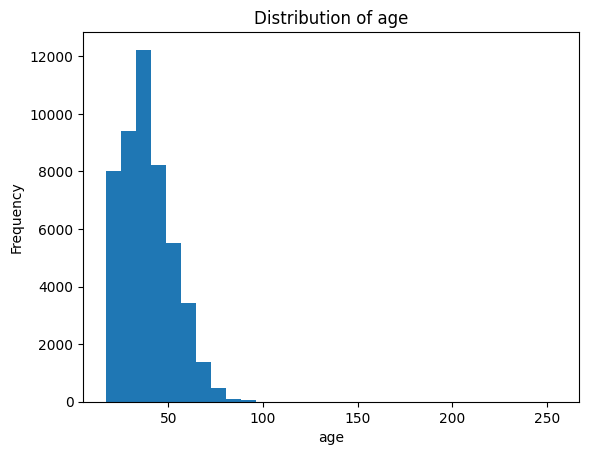

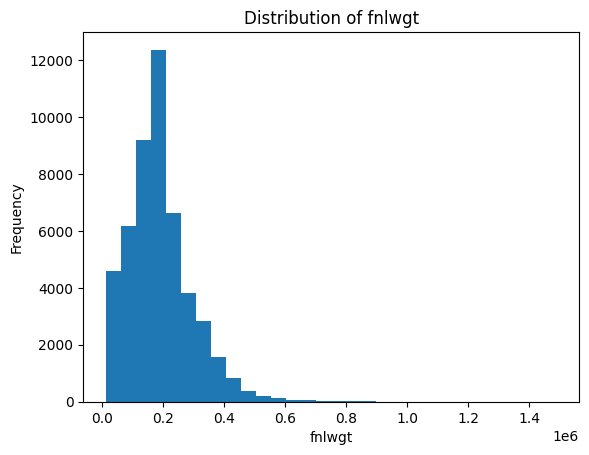

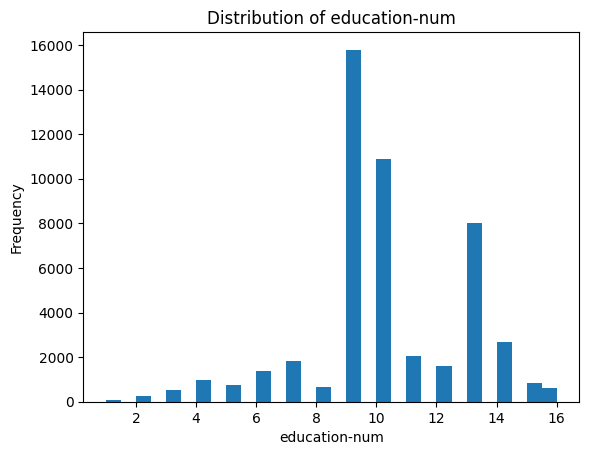

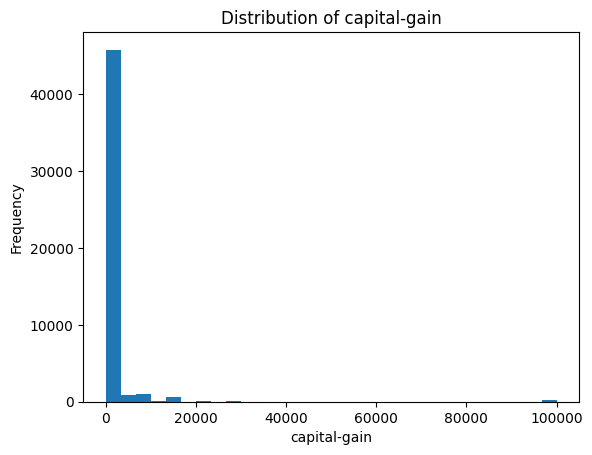

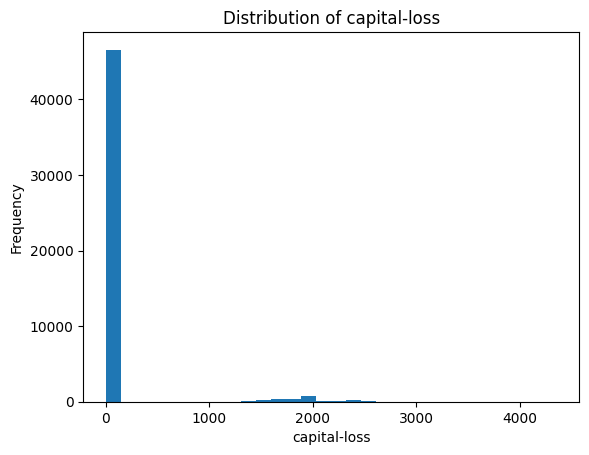

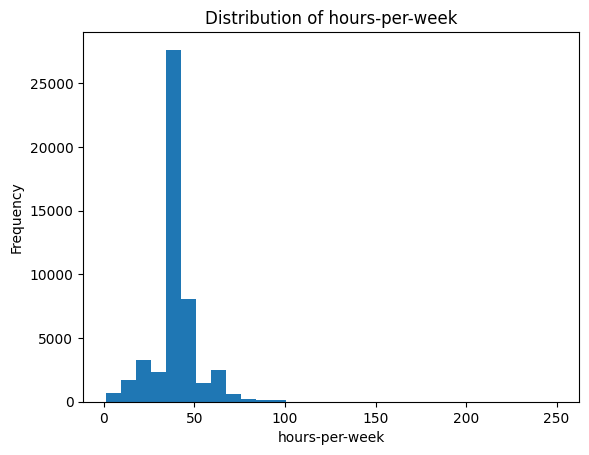

In [ ]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in num_cols:
    plt.figure()
    plt.hist(adult_df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Analyzing correlations between variables

In [ ]:
corr_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr_matrix = adult_df[corr_cols].corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.074043,0.029528,0.073563,0.056246,0.099152
fnlwgt,-0.074043,1.000000,-0.038761,-0.003706,-0.004366,-0.011105
education-num,0.029528,-0.038761,1.000000,0.125146,0.080972,0.136051
capital-gain,0.073563,-0.003706,0.125146,1.000000,-0.031441,0.079858
capital-loss,0.056246,-0.004366,0.080972,-0.031441,1.000000,0.050937
hours-per-week,0.099152,-0.011105,0.136051,0.079858,0.050937,1.000000


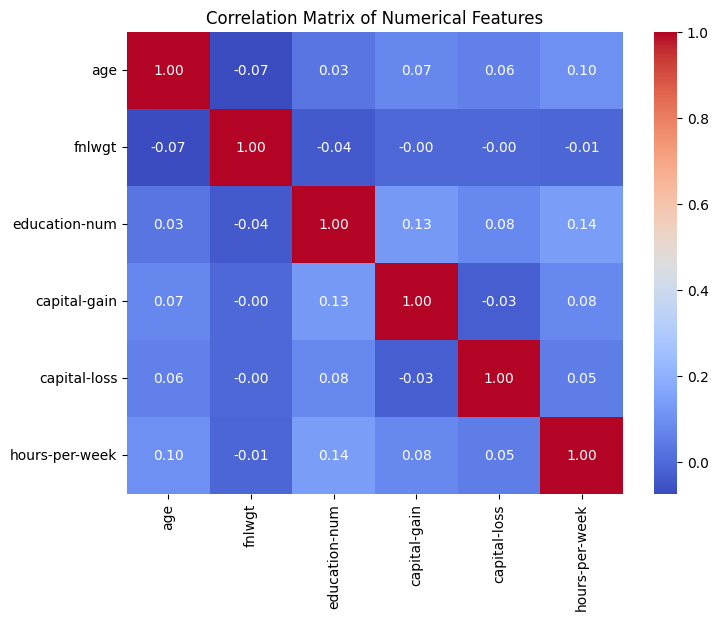

In [ ]:
#Visualizing using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Fitting PCA on scaled data

In [ ]:
pca = PCA()
pca.fit(adult_scaled_df)

PCA()

In [ ]:
#Explained variance ratio
pca.explained_variance_ratio_

array([3.57321472e-02, 2.78499609e-02, 2.64598628e-02, 2.15347317e-02,
       1.91536379e-02, 1.79583269e-02, 1.62546526e-02, 1.58561143e-02,
       1.48609104e-02, 1.37666779e-02, 1.35502152e-02, 1.31392230e-02,
       1.27081681e-02, 1.25854822e-02, 1.22988462e-02, 1.22175852e-02,
       1.20765502e-02, 1.17981015e-02, 1.17428592e-02, 1.15692588e-02,
       1.14676795e-02, 1.14246682e-02, 1.13244566e-02, 1.12527171e-02,
       1.12255965e-02, 1.11711150e-02, 1.11619981e-02, 1.10638290e-02,
       1.09962930e-02, 1.09489825e-02, 1.08826626e-02, 1.08151879e-02,
       1.07762689e-02, 1.07444341e-02, 1.06983385e-02, 1.06247898e-02,
       1.06028874e-02, 1.05912634e-02, 1.05792311e-02, 1.05585917e-02,
       1.05521269e-02, 1.05482464e-02, 1.05443709e-02, 1.05423553e-02,
       1.05395241e-02, 1.05363054e-02, 1.05341031e-02, 1.05321409e-02,
       1.05293928e-02, 1.05273309e-02, 1.05172822e-02, 1.05111184e-02,
       1.05023625e-02, 1.04995791e-02, 1.04789801e-02, 1.04724117e-02,
      

In [ ]:
#Cumulative explained variance

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.03573215, 0.06358211, 0.09004197, 0.1115767 , 0.13073034,
       0.14868867, 0.16494332, 0.18079943, 0.19566034, 0.20942702,
       0.22297724, 0.23611646, 0.24882463, 0.26141011, 0.27370896,
       0.28592654, 0.29800309, 0.30980119, 0.32154405, 0.33311331,
       0.34458099, 0.35600566, 0.36733012, 0.37858283, 0.38980843,
       0.40097955, 0.41214154, 0.42320537, 0.43420167, 0.44515065,
       0.45603331, 0.4668485 , 0.47762477, 0.4883692 , 0.49906754,
       0.50969233, 0.52029522, 0.53088648, 0.54146571, 0.5520243 ,
       0.56257643, 0.57312468, 0.58366905, 0.5942114 , 0.60475093,
       0.61528723, 0.62582134, 0.63635348, 0.64688287, 0.6574102 ,
       0.66792748, 0.6784386 , 0.68894096, 0.69944054, 0.70991952,
       0.72039193, 0.73082285, 0.74122147, 0.75161585, 0.76197876,
       0.77232162, 0.78260085, 0.79286569, 0.80306492, 0.81323801,
       0.82337668, 0.83349036, 0.84355325, 0.85349083, 0.86335187,
       0.87311501, 0.8827824 , 0.8924303 , 0.90200353, 0.91135

In [ ]:
#reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(adult_scaled_df)

#Create DataFrame:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

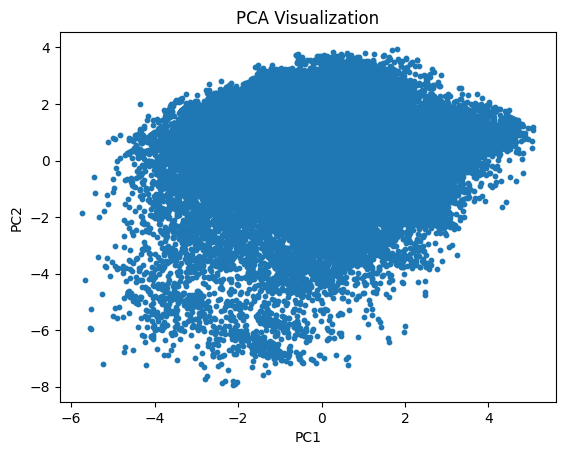

In [ ]:
#Plot PCA Visualization
plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

# Clustering

Apply clustering algorithms

In [ ]:
#KMeans

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_scaled_df)
    inertia.append(kmeans.inertia_)

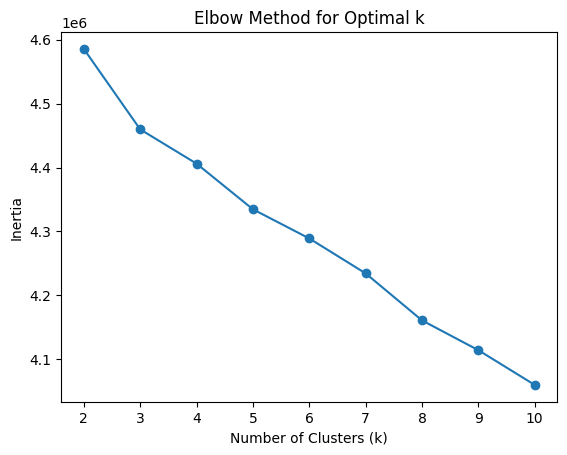

In [ ]:
#Ploting elbow curve

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#silhouette scores
sample_df = adult_scaled_df.sample(n=10000, random_state=42)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sample_df)
    score = silhouette_score(sample_df, labels)
    silhouette_scores.append(score)

silhouette_scores

[np.float64(0.050584843517091256),
 np.float64(0.036288306057665046),
 np.float64(0.04144541715247185),
 np.float64(0.04310847606549855),
 np.float64(0.06181344973952694),
 np.float64(0.06672525126110394),
 np.float64(0.03603824108350435),
 np.float64(0.040255290991912066),
 np.float64(0.04107899959895066)]

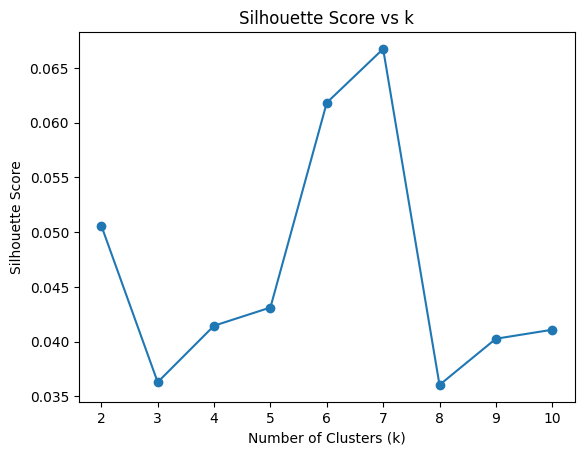

In [ ]:
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

In [ ]:
#Final KMeans clustering

from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=7, random_state=42)
clusters = kmeans_final.fit_predict(adult_scaled_df)

adult_scaled_df['Cluster'] = clusters
adult_df["Cluster"] = clusters

In [ ]:
#Crosstab (Cluster vs Income)
pd.crosstab(adult_df["Cluster"], adult_df["income"])

income,<=50K,<=50K.,>50K,>50K.
Cluster,,,,
0,4683,2330,51,38
1,487,228,27,14
2,462,246,602,302
3,6388,3146,5185,2549
4,10749,5549,973,463
5,1154,542,285,144
6,797,394,718,336


In [ ]:
#Crosstab (Cluster vs Sex)
pd.crosstab(adult_df["Cluster"], adult_df["sex"])

sex,Female,Male
Cluster,,
0,3281,3821
1,220,536
2,199,1413
3,27,17241
4,10136,7598
5,99,2026
6,2230,15


In [ ]:
pd.crosstab(adult_df["Cluster"],adult_df["income"],normalize="index") * 100

income,<=50K,<=50K.,>50K,>50K.
Cluster,,,,
0,65.939172,32.807660,0.718108,0.535061
1,64.417989,30.158730,3.571429,1.851852
2,28.660050,15.260546,37.344913,18.734491
3,36.993282,18.218670,30.026639,14.761408
4,60.612383,31.290177,5.486636,2.610804
5,54.305882,25.505882,13.411765,6.776471
6,35.501114,17.550111,31.982183,14.966592


Agglomerative Clustering


In [ ]:
adult_scaled_sample = adult_scaled_df.drop("Cluster", axis=1).sample(n=10000,random_state=42)

agglo_model = AgglomerativeClustering(n_clusters=4,linkage="ward")

agglo_sample_labels = agglo_model.fit_predict(adult_scaled_sample)

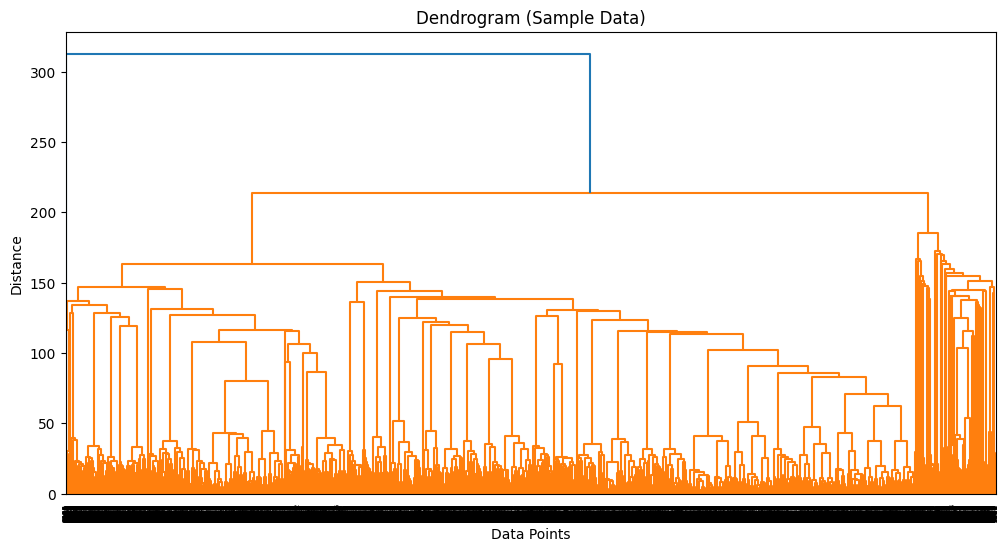

In [ ]:
#Dendogram

linked = linkage(adult_scaled_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram (Sample Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()